In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

__file__ = os.path.abspath("")
LABELS = ["Dog", "Cat"]
IMG_SIZE=100



In [6]:
from random import shuffle

def create_training_data(datadir:str):
    training_data = []
    for label in LABELS:
        path = os.path.join(datadir, label)
        label_num = LABELS.index(label)
        for img in os.listdir(path=path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                training_data.append([img_array, label_num])
            except Exception as e:
                pass
    shuffle(training_data)
    return training_data

In [ ]:
datadir = os.path.join(__file__, "imgs/PetImages/")
training_data = create_training_data(datadir=datadir)

In [ ]:
x = []
y = []

for feature, label in training_data:
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)



In [ ]:
import gc

gc.collect()

0

In [ ]:
# save processed data

np.save(os.path.join(__file__,"x.npy"),x)
np.save(os.path.join(__file__,"y.npy"),y)

In [3]:
# loading the data set
with open("x.npy","rb") as f:
    x = np.load(f)
with open("y.npy", "rb") as f:
    y = np.load(f)

In [9]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation,Flatten

model = Sequential()

print(tf.__version__)

2.13.0


In [5]:
x = tf.keras.utils.normalize(x, axis=1)

In [6]:
model.add(Conv2D(64, (3,3), input_shape=x.shape[1:], padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss=tf.keras.losses.binary_crossentropy, 
              optimizer="adam",
              metrics=["accuracy"])
model.fit(x, y,
          batch_size=32,
          epochs=3,
          validation_split=0.1)


2023-09-24 18:30:12.546681: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 898040000 exceeds 10% of free system memory.


Epoch 1/3


2023-09-24 18:30:28.931812: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 81920000 exceeds 10% of free system memory.
2023-09-24 18:30:29.593104: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 40960000 exceeds 10% of free system memory.
2023-09-24 18:30:29.594207: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 81920000 exceeds 10% of free system memory.


  1/702 [..............................] - ETA: 42:59 - loss: 0.6872 - accuracy: 0.6562

2023-09-24 18:30:29.867252: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 81920000 exceeds 10% of free system memory.


702/702 [==============================] - 430s 608ms/step - loss: 0.6595 - accuracy: 0.5957 - val_loss: 0.6244 - val_accuracy: 0.6754
Epoch 2/3
702/702 [==============================] - 540s 769ms/step - loss: 0.5645 - accuracy: 0.7085 - val_loss: 0.5389 - val_accuracy: 0.7347
Epoch 3/3
702/702 [==============================] - 440s 627ms/step - loss: 0.4881 - accuracy: 0.7674 - val_loss: 0.5053 - val_accuracy: 0.7527


In [7]:
model.save('cats_and_dogs.keras')

In [12]:
import keras as keras
model = keras.models.load_model("cats_and_dogs.keras")

testdir = os.path.join(__file__,"test/")
test_data = create_training_data(datadir=testdir)



def prepare_test_data(data):
    x_test = []
    y_test = []
    for feature, label in data:
        x_test.append(feature)
        y_test.append(label)
    x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y_test = np.array(y_test)
    return (x_test, y_test)


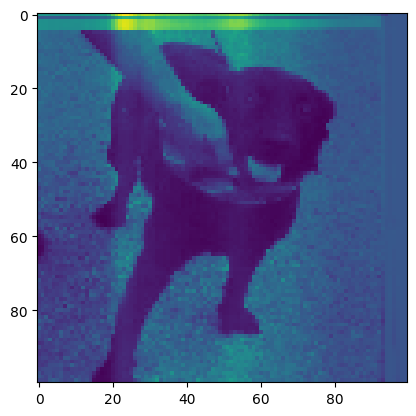

1/1 [==============================] - 0s 179ms/step
[[0.10676833]]
1/1 [==============================] - 0s 258ms/step
Dog


In [15]:
(x, y) = prepare_test_data(test_data)
x = tf.keras.utils.normalize(x,axis=1)
p = x[1].reshape(-1, IMG_SIZE, IMG_SIZE, 1)
plt.imshow(p[0])
plt.show()
print(model.predict(p))
pred = round(model.predict(p)[0][0])

print(LABELS[pred])

In [ ]:
from keras.callbacks import TensorBoard